In [1]:
# Imports 
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout,MaxPooling2D
from keras.layers import Conv2D
from tensorflow.keras.utils import to_categorical
from keras import Sequential,Input

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# Make input daat from 0 to 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
#print(f'{x_train.shape}')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


def CNN():
  model = Sequential([
                      Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = (28,28,1)),
                      Conv2D(64, kernel_size=(3, 3), activation='relu'),
                      MaxPooling2D(pool_size=(2,2)),
                      Dropout(0.2),
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dropout(0.5),
                      Dense(10, activation='softmax')
                      ]
                      )
  
  model.compile(loss = 'categorical_crossentropy', optimizer= 'adam',metrics =['acc' , 'mse'])
  return model


def train(model):
  with tf.device('/device:GPU:0'):
      history = model.fit(x_train,y_train ,
                          batch_size = 256,
                          epochs = 10,
                          verbose = 1,
                          validation_split = 0.1)
            
  return history.history

def score(model):
  return model.evaluate(x_test,y_test,verbose=0)

print(x_train.shape)
model = CNN()
model.summary()

(60000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1

In [3]:
history = train(model)

Epoch 1/10
211/211 [==============================] - 12s 26ms/step - loss: 0.3278 - acc: 0.8997 - mse: 0.0147 - val_loss: 0.0672 - val_acc: 0.9818 - val_mse: 0.0029
Epoch 2/10
211/211 [==============================] - 5s 23ms/step - loss: 0.1011 - acc: 0.9690 - mse: 0.0047 - val_loss: 0.0459 - val_acc: 0.9877 - val_mse: 0.0019
Epoch 3/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0720 - acc: 0.9787 - mse: 0.0033 - val_loss: 0.0426 - val_acc: 0.9892 - val_mse: 0.0017
Epoch 4/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0583 - acc: 0.9823 - mse: 0.0027 - val_loss: 0.0390 - val_acc: 0.9903 - val_mse: 0.0015
Epoch 5/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0506 - acc: 0.9847 - mse: 0.0024 - val_loss: 0.0344 - val_acc: 0.9907 - val_mse: 0.0015
Epoch 6/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0433 - acc: 0.9864 - mse: 0.0021 - val_loss: 0.0323 - val_acc: 0.9913 - val_mse: 0.0014
Epoch 7/1

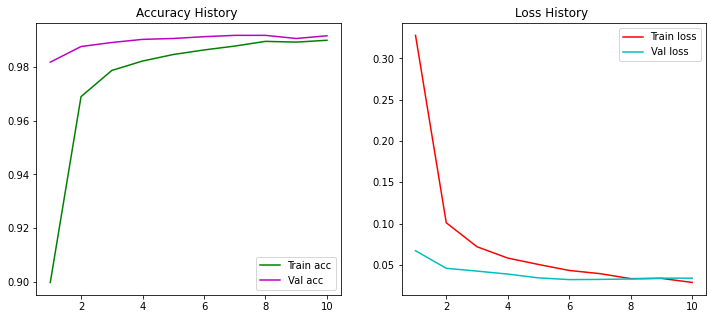

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


def plots(epochs , history):
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches((12,5))
    ax[0].plot(epochs, history['acc'] , 'g' , label = 'Train acc')
    ax[0].plot(epochs, history['val_acc'],'m',label = 'Val acc')
    ax[0].set_title('Accuracy History ')
    ax[0].legend()

    ax[1].plot(epochs, history['loss'] , 'r',label = 'Train loss')
    ax[1].plot(epochs, history['val_loss'],'c',label = 'Val loss')
    ax[1].set_title('Loss History ')
    ax[1].legend()

    fig.show()


epochs = range(1,11)
plots(epochs,history)





In [5]:
acc = score(model)
print(f' Test Score [Accuracy]: {acc[1]*100:.2f}%')

 Test Score [Accuracy]: 99.16%


# CIFAR10 dataset

In [6]:
from tensorflow.keras.datasets import cifar10
# Load Data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)       

In [7]:
# Train model 
history = model.fit(train_images, train_labels, batch_size=256, epochs=10, verbose=1, validation_split = 0.1).history

Epoch 1/10
176/176 [==============================] - 8s 41ms/step - loss: 1.7473 - acc: 0.3587 - val_loss: 1.3774 - val_acc: 0.5026
Epoch 2/10
176/176 [==============================] - 6s 37ms/step - loss: 1.3390 - acc: 0.5214 - val_loss: 1.1195 - val_acc: 0.6046
Epoch 3/10
176/176 [==============================] - 7s 37ms/step - loss: 1.1629 - acc: 0.5896 - val_loss: 1.0064 - val_acc: 0.6530
Epoch 4/10
176/176 [==============================] - 7s 37ms/step - loss: 1.0447 - acc: 0.6324 - val_loss: 0.8873 - val_acc: 0.6830
Epoch 5/10
176/176 [==============================] - 7s 37ms/step - loss: 0.9602 - acc: 0.6645 - val_loss: 0.8284 - val_acc: 0.7086
Epoch 6/10
176/176 [==============================] - 7s 37ms/step - loss: 0.8868 - acc: 0.6921 - val_loss: 0.7922 - val_acc: 0.7244
Epoch 7/10
176/176 [==============================] - 7s 37ms/step - loss: 0.8284 - acc: 0.7085 - val_loss: 0.7848 - val_acc: 0.7250
Epoch 8/10
176/176 [==============================] - 6s 37ms/step - 

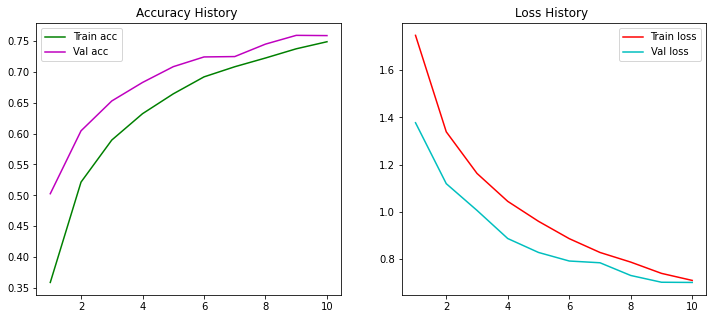

In [8]:
plots(range(1,11), history)

In [9]:
acc = model.evaluate(test_images,test_labels)
print(f' Test Score [Accuracy]: {acc[1]*100:.2f}%')

313/313 [==============================] - 2s 7ms/step - loss: 0.7469 - acc: 0.7424
 Test Score [Accuracy]: 74.24%
